# Compare the analytical solution and the neural net mask

In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import sys
sys.path.append("..")
from utils.model_mask3 import Net_mask
from scripts import data_example_mask3 as dem
import torch
import numpy as np
import matplotlib.pyplot as plt

In [4]:
model = Net_mask()
model.load_state_dict(torch.load('../saved_models/mask/model_weights_mask.pth'))
model.eval()

Net_mask(
  (layers): Sequential(
    (0): Linear(in_features=20, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [5]:
#d = [3, -2, 1, 5, -5]
#d = [3, -2, 1, 5, -5]
#x = [2, 3, 5, 8, 9]
#d = [2, 2, 3, 1.3, 0.5, 1]
#x = [1, 3, 4, 5, 6, 9]
#input_tensor = dem.get_input_tensor(d, x)
#d = [1.91160977, 1.44917132, 1.0639541, 0.95838326, 1.88879321]
d = [1.91160977, 1.44917132, 1.0639541, 0.95838326, 1.88879321]
x = [1, 3, 4, 5, 9]
input_tensor = dem.get_input_tensor(d, x)


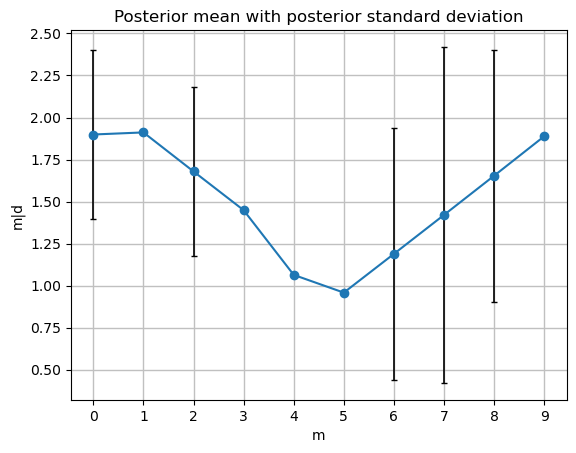

Text(0, 0.5, 'm|d')

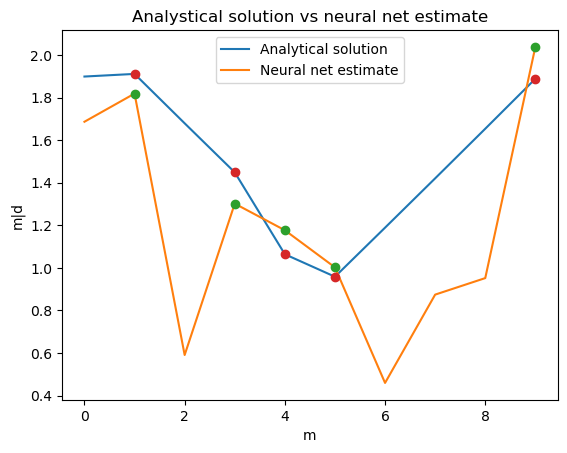

In [6]:
#d_tensor = torch.tensor(d, dtype=torch.float)
out = model(input_tensor)
with torch.no_grad():
    out = out.numpy().flatten()

plt.figure()
post_mean, post_cov = dem.get_posteior(d, x)
dem.plot_posterior(post_mean, post_cov)

plt.figure()
plt.plot(range(10), post_mean)
plt.plot(range(10), out)
plt.legend(["Analytical solution", "Neural net estimate"])
plt.plot(x, [out[i] for i in x], 'o')
plt.plot(x, [post_mean[i] for i in x], 'o')
plt.title("Analystical solution vs neural net estimate")
plt.xlabel("m")
plt.ylabel("m|d")